<a href="https://colab.research.google.com/github/Basim415/BrickByBrick/blob/main/Brick_By_Brick._new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import joblib

best_est = joblib.load('reports/tables/best_est.joblib')
fe_ext = joblib.load('reports/tables/fe_ext.joblib')
feature_col2 = joblib.load('reports/tables/feature_col2.joblib')


In [2]:
import os
from pathlib import Path

# Change into your repo folder
os.chdir("/content/BrickByBrick")
print("Current working directory:", os.getcwd())

# Quick check: list what's inside
!ls -la


Current working directory: /content/BrickByBrick
total 760
drwxr-xr-x 7 root root   4096 Sep 20 07:34 .
drwxr-xr-x 1 root root   4096 Sep 20 07:34 ..
drwxr-xr-x 2 root root   4096 Sep 20 07:34 app
-rw-r--r-- 1 root root 739601 Sep 20 07:34 Brick_By_Brick.ipynb
drwxr-xr-x 8 root root   4096 Sep 20 07:34 .git
-rw-r--r-- 1 root root   1070 Sep 20 07:34 LICENSE
drwxr-xr-x 2 root root   4096 Sep 20 07:34 notebooks
-rw-r--r-- 1 root root     14 Sep 20 07:34 README.md
drwxr-xr-x 4 root root   4096 Sep 20 07:34 reports
drwxr-xr-x 2 root root   4096 Sep 20 07:34 src


In [59]:
import os
from dotenv import load_dotenv

load_dotenv()
fred_api_key = os.getenv("FRED_API_KEY")


In [3]:
import os
os.chdir("/content/BrickByBrick")  # change to your repo folder
print("Current working directory:", os.getcwd())


Current working directory: /content/BrickByBrick


In [4]:
from pathlib import Path

REPO_ROOT = Path.cwd()
FIGDIR = REPO_ROOT / 'reports' / 'figures'
TBLDIR = REPO_ROOT / 'reports' / 'tables'
DATADIR = REPO_ROOT / 'data'
FIGDIR.mkdir(parents=True, exist_ok=True)
TBLDIR.mkdir(parents=True, exist_ok=True)
DATADIR.mkdir(parents=True, exist_ok=True)

print("Repo root:", REPO_ROOT)


Repo root: /content/BrickByBrick


In [5]:
!pip -q install kaggle pandas numpy scikit-learn matplotlib plotly folium shapely geopandas lightgbm


In [52]:
pip install pandas_datareader


In [6]:
from google.colab import files
uploaded = files.upload()  # upload kaggle.json

Path.home().joinpath('.kaggle').mkdir(exist_ok=True)
os.replace('kaggle.json', str(Path.home()/'.kaggle'/'kaggle.json'))
os.chmod(str(Path.home()/'.kaggle'/'kaggle.json'), 0o600)

!kaggle datasets download -d zillow/zecon -p data
!unzip -o data/zecon.zip -d data
!ls -la data | head -n 50


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/zillow/zecon
License(s): copyright-authors
 96% 492M/511M [00:01<00:00, 334MB/s]
100% 511M/511M [00:01<00:00, 423MB/s]
Archive:  data/zecon.zip
  inflating: data/City_time_series.csv  
  inflating: data/CountyCrossWalk_Zillow.csv  
  inflating: data/County_time_series.csv  
  inflating: data/DataDictionary.csv  
  inflating: data/Metro_time_series.csv  
  inflating: data/Neighborhood_time_series.csv  
  inflating: data/State_time_series.csv  
  inflating: data/Zip_time_series.csv  
  inflating: data/all_available_metrics.json  
  inflating: data/cities_crosswalk.csv  
  inflating: data/fields_per_level.json  
total 2390824
drwxr-xr-x 2 root root      4096 Sep 20 07:35 .
drwxr-xr-x 8 root root      4096 Sep 20 07:34 ..
-rw-r--r-- 1 root root      3409 Sep 21  2019 all_available_metrics.json
-rw-r--r-- 1 root root   1074309 Sep 21  2019 cities_crosswalk.csv
-rw-r--r-- 1 root root 689627012 Sep 21  2019 City_ti

In [7]:
import pandas as pd
import glob

paths = glob.glob('data/*Metro*time*series*.csv') + glob.glob('data/*metro*series*.csv')
paths = sorted(paths)
print(paths[:5])  # first few candidate files


['data/Metro_time_series.csv']


In [8]:
if not paths:
    raise FileNotFoundError("Couldn't find a metro time-series CSV in data/. Check the listing above.")

metro_path = paths[0]
df = pd.read_csv(metro_path)
print('Loaded:', metro_path)
df.head(3)


Loaded: data/Metro_time_series.csv


,Date,RegionName,AgeOfInventory,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,InventorySeasonallyAdjusted_BottomTier,InventorySeasonallyAdjusted_MiddleTier,InventorySeasonallyAdjusted_TopTier,MedianListingPricePerSqft_1Bedroom,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
0,1996-04-30,10180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1996-04-30,10220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,28600.0,28600.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1996-04-30,10300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,53000.0,NaN,78500.0,78600.0,124800.0,NaN,NaN,NaN,NaN,NaN


In [9]:
# Standardize column names
df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]

# Detect date column
date_col = next((c for c in df.columns if 'date' in c), None)
if not date_col:
    raise KeyError('No date-like column found.')

df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
df = df.dropna(subset=[date_col]).sort_values(date_col)

df.head(3), df.columns.tolist()[:20]


(          date regionname  ageofinventory  daysonzillow_allhomes  \
 0   1996-04-30      10180             NaN                    NaN   
 451 1996-04-30      36900             NaN                    NaN   
 452 1996-04-30      36940             NaN                    NaN   
 
      inventoryseasonallyadjusted_allhomes  inventoryraw_allhomes  \
 0                                     NaN                    NaN   
 451                                   NaN                    NaN   
 452                                   NaN                    NaN   
 
      inventoryseasonallyadjusted_bottomtier  \
 0                                       NaN   
 451                                     NaN   
 452                                     NaN   
 
      inventoryseasonallyadjusted_middletier  \
 0                                       NaN   
 451                                     NaN   
 452                                     NaN   
 
      inventoryseasonallyadjusted_toptier  medianlisting

In [22]:
# Guess geo column
name_cols = [c for c in df.columns if c in ['regionname', 'metro', 'name', 'region_name']]
geo_col = name_cols[0] if name_cols else None
print("Geo column:", geo_col)

# FIX: Add actual value column name
value_candidates = ['zhvi_allhomes', 'zhvi', 'median_home_value', 'value', 'median_value', 'median_sale_price', 'medianlistingprice']
target_col = next((c for c in value_candidates if c in df.columns), None)
print("Target column:", target_col)

# Define date column (case sensitive)
date_col = 'date'

# Rebuild df_small safely
df_small = df[[date_col] + ([geo_col] if geo_col else []) + ([target_col] if target_col else [])].copy()
df_small.head(5)



Geo column: regionname
Target column: zhvi_allhomes


,date,regionname,zhvi_allhomes
0,1996-04-30,10180,NaN
451,1996-04-30,36900,NaN
452,1996-04-30,36940,84400.0
453,1996-04-30,36980,60800.0
454,1996-04-30,37020,78600.0


In [23]:
print("Columns:", df.columns.tolist())


Columns: ['date', 'regionname', 'ageofinventory', 'daysonzillow_allhomes', 'inventoryseasonallyadjusted_allhomes', 'inventoryraw_allhomes', 'inventoryseasonallyadjusted_bottomtier', 'inventoryseasonallyadjusted_middletier', 'inventoryseasonallyadjusted_toptier', 'medianlistingpricepersqft_1bedroom', 'medianlistingpricepersqft_2bedroom', 'medianlistingpricepersqft_3bedroom', 'medianlistingpricepersqft_4bedroom', 'medianlistingpricepersqft_5bedroomormore', 'medianlistingpricepersqft_allhomes', 'medianlistingpricepersqft_condocoop', 'medianlistingpricepersqft_duplextriplex', 'medianlistingpricepersqft_singlefamilyresidence', 'medianlistingprice_1bedroom', 'medianlistingprice_2bedroom', 'medianlistingprice_3bedroom', 'medianlistingprice_4bedroom', 'medianlistingprice_5bedroomormore', 'medianlistingprice_allhomes', 'medianlistingprice_condocoop', 'medianlistingprice_duplextriplex', 'medianlistingprice_singlefamilyresidence', 'medianpctofpricereduction_allhomes', 'medianpctofpricereduction_c

In [24]:
geo_col = 'regionname'
date_col = 'date'
target_col = 'zhvi_allhomes'

# Bay Area metro codes (MSA codes from earlier)
bay_area_msa_codes = ['41860', '41940', '40900', '44700']

# Filter the DataFrame
df_focus = df_small[df_small[geo_col].astype(str).isin(bay_area_msa_codes)]
df_focus = df_focus[[geo_col, date_col, target_col]].dropna()
df_focus[date_col] = pd.to_datetime(df_focus[date_col])

# Preview to confirm
print(df_focus.head(3))


    regionname       date  zhvi_allhomes
547      41860 1996-04-30       225200.0
548      41940 1996-04-30       251700.0
528      40900 1996-04-30       133900.0


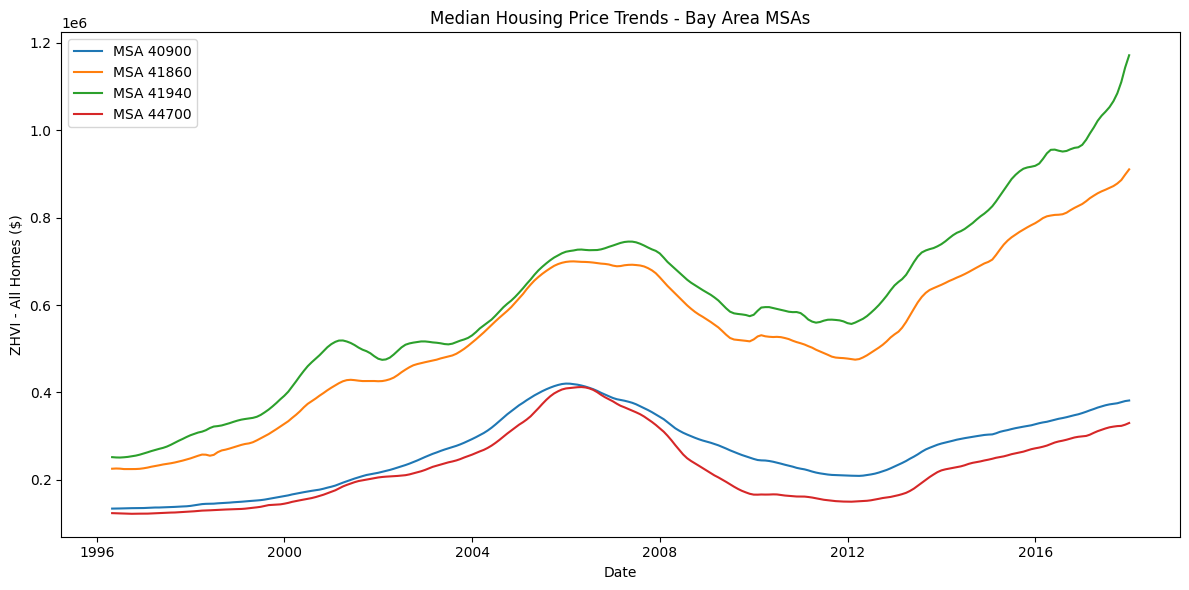

In [25]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12, 6)

for g, sub in df_focus.groupby(geo_col):
    sub = sub.sort_values(date_col)
    plt.plot(sub[date_col], sub[target_col], label=f"MSA {g}")

plt.title('Median Housing Price Trends - Bay Area MSAs')
plt.xlabel('Date')
plt.ylabel('ZHVI - All Homes ($)')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig("bay_area_price_trends.png", dpi=200)
plt.show()


In [116]:
# Export MSA-level housing price trends for Tableau
msa_csv_path = "reports/tables/msa_price_trends.csv"
df_focus.to_csv(msa_csv_path, index=False)
print(" Saved MSA price trends →", msa_csv_path)


 Saved MSA price trends → reports/tables/msa_price_trends.csv


In [26]:
fe = df_focus.copy()
fe['year'] = fe[date_col].dt.year
fe['month'] = fe[date_col].dt.month

def add_lags(frame, col, lags=(1,12)):
    frame = frame.sort_values(date_col)
    for L in lags:
        frame[f'{col}_tminus{L}'] = frame[col].shift(L)
    return frame

fe = fe.groupby(geo_col, group_keys=False).apply(lambda g: add_lags(g, target_col)).dropna()
fe.head(5)


/tmp/ipython-input-3572637255.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  fe = fe.groupby(geo_col, group_keys=False).apply(lambda g: add_lags(g, target_col)).dropna()


,regionname,date,zhvi_allhomes,year,month,zhvi_allhomes_tminus1,zhvi_allhomes_tminus12
8864,41860,1997-04-30,233000.0,1997,4,231300.0,225200.0
8865,41940,1997-04-30,270600.0,1997,4,268100.0,251700.0
8845,40900,1997-04-30,136400.0,1997,4,136400.0,133900.0
8913,44700,1997-04-30,123800.0,1997,4,123300.0,123500.0
9572,41860,1997-05-31,234900.0,1997,5,233000.0,225700.0


In [27]:
import os
os.chdir("/content/BrickByBrick")  # update if your repo name differs
print("CWD:", os.getcwd())


CWD: /content/BrickByBrick


In [28]:
import glob, pandas as pd

# find a metro-level time series CSV
paths = sorted(glob.glob('data/*Metro*time*series*.csv') + glob.glob('data/*m# Feature Engineering Function — insert this once after df is created
def add_time_series_features(df, target='zhvi_allhomes'):
    df = df.copy()
    df = df.sort_values(['regionname', 'date'])

    # Lags
    df[f'{target}_tminus1'] = df.groupby('regionname')[target].shift(1)
    df[f'{target}_tminus3'] = df.groupby('regionname')[target].shift(3)
    df[f'{target}_tminus12'] = df.groupby('regionname')[target].shift(12)

    # Percent changes
    df['pct_change_1'] = df.groupby('regionname')[target].pct_change(1)
    df['pct_change_3'] = df.groupby('regionname')[target].pct_change(3)
    df['pct_change_12'] = df.groupby('regionname')[target].pct_change(12)

    # Rolling averages
    df['roll3'] = df.groupby('regionname')[target].transform(lambda x: x.rolling(3).mean())
    df['roll6'] = df.groupby('regionname')[target].transform(lambda x: x.rolling(6).mean())
    df['roll12'] = df.groupby('regionname')[target].transform(lambda x: x.rolling(12).mean())

    # Date parts
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['is_winter'] = df['month'].isin([12, 1, 2]).astype(int)
    df['is_summer'] = df['month'].isin([6, 7, 8]).astype(int)

    return df
etro*series*.csv'))
assert paths, "No metro time-series CSV found in data/. Re-run the Kaggle download/unzip cells."
metro_path = paths[0]
df = pd.read_csv(metro_path)

# clean columns + date
df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]
date_col = next((c for c in df.columns if 'date' in c), None)
assert date_col, "No date column found; inspect df.columns"
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
df = df.dropna(subset=[date_col]).sort_values(date_col)
print("Loaded:", metro_path, "| date_col:", date_col)


Loaded: data/Metro_time_series.csv | date_col: date


In [51]:
# Feature Engineering Function
def add_time_series_features(df, target='zhvi_allhomes'):
    df = df.copy()
    df = df.sort_values(['regionname', 'date'])

    # Lags
    df[f'{target}_tminus1'] = df.groupby('regionname')[target].shift(1)
    df[f'{target}_tminus3'] = df.groupby('regionname')[target].shift(3)
    df[f'{target}_tminus12'] = df.groupby('regionname')[target].shift(12)

    # Percent changes
    df['pct_change_1'] = df.groupby('regionname')[target].pct_change(1)
    df['pct_change_3'] = df.groupby('regionname')[target].pct_change(3)
    df['pct_change_12'] = df.groupby('regionname')[target].pct_change(12)

    # Rolling averages
    df['roll3'] = df.groupby('regionname')[target].transform(lambda x: x.rolling(3).mean())
    df['roll6'] = df.groupby('regionname')[target].transform(lambda x: x.rolling(6).mean())
    df['roll12'] = df.groupby('regionname')[target].transform(lambda x: x.rolling(12).mean())

    # Date parts
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['is_winter'] = df['month'].isin([12, 1, 2]).astype(int)
    df['is_summer'] = df['month'].isin([6, 7, 8]).astype(int)

    return df


In [53]:
# Ensure date column is datetime type
df['date'] = pd.to_datetime(df['date'])

# Create new DataFrame with engineered time-series features
df_fe = add_time_series_features(df)
df_fe.head()


/tmp/ipython-input-3146108835.py:12: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['pct_change_1'] = df.groupby('regionname')[target].pct_change(1)
/tmp/ipython-input-3146108835.py:13: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['pct_change_3'] = df.groupby('regionname')[target].pct_change(3)
/tmp/ipython-input-3146108835.py:14: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA v

,date,regionname,ageofinventory,daysonzillow_allhomes,inventoryseasonallyadjusted_allhomes,inventoryraw_allhomes,inventoryseasonallyadjusted_bottomtier,inventoryseasonallyadjusted_middletier,inventoryseasonallyadjusted_toptier,medianlistingpricepersqft_1bedroom,...,pct_change_1,pct_change_3,pct_change_12,roll3,roll6,roll12,month,year,is_winter,is_summer
124253,2010-01-31,10100,NaN,NaN,133.0,105.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,2010,1,0
125129,2010-02-28,10100,NaN,NaN,138.0,110.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,2010,1,0
126005,2010-03-31,10100,NaN,NaN,143.0,121.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3,2010,0,0
126888,2010-04-30,10100,NaN,NaN,134.0,128.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4,2010,0,0
127773,2010-05-31,10100,NaN,NaN,112.0,103.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5,2010,0,0


In [65]:
import pandas_datareader.data as web
from datetime import datetime

start = datetime(1996, 1, 1)
end = datetime.today()

df_macro = pd.DataFrame()
df_macro['mortgage_rate'] = web.DataReader('MORTGAGE30US', 'fred', start, end)
df_macro['cpi'] = web.DataReader('CPIAUCSL', 'fred', start, end)
df_macro['unemployment'] = web.DataReader('UNRATE', 'fred', start, end)

df_macro = df_macro.reset_index().rename(columns={"DATE": "date"})
df_macro['date'] = pd.to_datetime(df_macro['date'])

df_macro.head()


,date,mortgage_rate,cpi,unemployment
0,1996-01-05,7.02,NaN,NaN
1,1996-01-12,7.08,NaN,NaN
2,1996-01-19,7.02,NaN,NaN
3,1996-01-26,7.00,NaN,NaN
4,1996-02-02,7.02,NaN,NaN


In [66]:
df_macro = df_macro.set_index('date').resample('M').mean().reset_index()


/tmp/ipython-input-4021191777.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_macro = df_macro.set_index('date').resample('M').mean().reset_index()


In [67]:
df_merged = pd.merge(df_fe, df_macro, on='date', how='left')

df_merged[['date', 'regionname', 'zhvi_allhomes', 'mortgage_rate', 'cpi', 'unemployment']].head()



,date,regionname,zhvi_allhomes,mortgage_rate,cpi,unemployment
0,2010-01-31,10100,NaN,5.0300,NaN,NaN
1,2010-02-28,10100,NaN,4.9900,NaN,NaN
2,2010-03-31,10100,NaN,4.9675,NaN,NaN
3,2010-04-30,10100,NaN,5.0980,217.403,9.9
4,2010-05-31,10100,NaN,4.8875,NaN,NaN


In [68]:
date_col = 'date'
target_col = 'zhvi_allhomes'
assert target_col in df.columns, f"target_col '{target_col}' not in df.columns"

# pick a geo/name column if present
name_cols = [c for c in df.columns if c in ['regionname','metro','name','region_name','region']]
geo_col = name_cols[0] if name_cols else None
print("geo_col:", geo_col, "| target_col:", target_col)


geo_col: regionname | target_col: zhvi_allhomes


In [71]:
# minimal columns
cols = [date_col, target_col] + ([geo_col] if geo_col else [])
df_small = df[cols].copy()

# focus on Sac + Bay Area labels if geo exists; fall back to full set if no matches
if geo_col:
    metros_interest = [
        'Sacramento','Roseville','Folsom',
        'San Francisco','Oakland','Berkeley',
        'San Jose','Sunnyvale','Santa Clara'
    ]
    mask = df_small[geo_col].astype(str).str.contains('|'.join(metros_interest), case=False, na=False)
    df_focus = df_small[mask].copy()
    if df_focus.empty:
        df_focus = df_small.copy()
else:
    df_focus = df_small.copy()

# feature engineering with safe lags
fe = df_focus.copy()
fe['year'] = fe[date_col].dt.year
fe['month'] = fe[date_col].dt.month

def add_lags(frame, date_col, target_col, lags=(1,12)):
    frame = frame.sort_values(date_col)
    for L in lags:
        frame[f'{target_col}_tminus{L}'] = frame[target_col].shift(L)
    return frame

if geo_col and (geo_col in fe.columns):
  fe = fe.groupby(geo_col, group_keys=False, observed=True).apply(
    lambda g: add_lags(g.copy(), date_col, target_col)
)
else:
    fe = add_lags(fe, date_col, target_col)

fe = fe.dropna().reset_index(drop=True)
print(f"fe.shape: {fe.shape} | Columns: {fe.columns.tolist()[:8]}")


fe.shape: (165619, 7) | Columns: ['date', 'zhvi_allhomes', 'regionname', 'year', 'month', 'zhvi_allhomes_tminus1', 'zhvi_allhomes_tminus12']


/tmp/ipython-input-1656491622.py:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  fe = fe.groupby(geo_col, group_keys=False, observed=True).apply(


In [72]:
import pandas as pd
CUTOFF = pd.Timestamp("2024-01-01")

train = fe[fe[date_col] < CUTOFF].copy()
test  = fe[fe[date_col] >= CUTOFF].copy()

exclude = [date_col, target_col]
if geo_col and (geo_col in fe.columns):
    exclude.append(geo_col)

# numeric-only features
num_cols = [c for c in fe.columns if pd.api.types.is_numeric_dtype(fe[c])]
feature_cols = [c for c in num_cols if c not in exclude]

X_train, y_train = train[feature_cols], train[target_col]
X_test,  y_test  = test[feature_cols],  test[target_col]

print(f"Features used ({len(feature_cols)}): {feature_cols[:8]}")
print("Train/Test shapes:", X_train.shape, X_test.shape)


Features used (4): ['year', 'month', 'zhvi_allhomes_tminus1', 'zhvi_allhomes_tminus12']
Train/Test shapes: (165619, 4) (0, 4)


In [33]:
print("Date min:", fe[date_col].min())
print("Date max:", fe[date_col].max())


Date min: 1997-04-30 00:00:00
Date max: 2017-12-31 00:00:00


In [34]:
CUTOFF = pd.Timestamp("2016-01-01")


In [35]:
# Set target column explicitly
target_col = 'zhvi_allhomes'
print("target_col set to:", target_col)


target_col set to: zhvi_allhomes


In [36]:
assert target_col in df.columns, f"{target_col} not found in df.columns"


In [37]:
print("date_col:", date_col)
print("target_col:", target_col)


date_col: date
target_col: zhvi_allhomes


In [73]:
import pandas as pd

# Safety checks
assert date_col is not None, "date_col is None. Make sure you re-ran the cell that sets date_col."
assert target_col is not None, "target_col is None. Set it explicitly, e.g. target_col = 'zhvi_allhomes'."

# Always use last 24 months as test
cutoff_date = fe[date_col].max() - pd.DateOffset(months=24)

train = fe[fe[date_col] < cutoff_date].copy()
test  = fe[fe[date_col] >= cutoff_date].copy()

exclude = [date_col, target_col]
if geo_col and (geo_col in fe.columns):
    exclude.append(geo_col)

# numeric-only features only
num_cols = [c for c in fe.columns if pd.api.types.is_numeric_dtype(fe[c])]
feature_cols = [c for c in num_cols if c not in exclude]

X_train, y_train = train[feature_cols], train[target_col]
X_test,  y_test  = test[feature_cols],  test[target_col]

print("Cutoff date:", cutoff_date.date())
print("Train shape:", train.shape, "| Test shape:", test.shape)
print("Features:", feature_cols[:12], "..." if len(feature_cols) > 12 else "")


Cutoff date: 2015-12-31
Train shape: (147369, 7) | Test shape: (18250, 7)
Features: ['year', 'month', 'zhvi_allhomes_tminus1', 'zhvi_allhomes_tminus12'] 


In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

def eval_model(model, Xtr, ytr, Xte, yte, name):
    model.fit(Xtr, ytr)
    pred = model.predict(Xte)
    mse = mean_squared_error(yte, pred)
    rmse = np.sqrt(mse)
    return {
        "model": name,
        "RMSE": rmse,
        "MAE": mean_absolute_error(yte, pred),
        "R2": r2_score(yte, pred)
    }

results = []
results.append(eval_model(LinearRegression(), X_train, y_train, X_test, y_test, "Linear"))
results.append(eval_model(RandomForestRegressor(n_estimators=400, random_state=42),
                          X_train, y_train, X_test, y_test, "RandomForest"))

metrics = pd.DataFrame(results)
display(metrics)

# save results for GitHub-friendly output
metrics.to_csv("reports/tables/metrics.csv", index=False)
print("Saved metrics to: reports/tables/metrics.csv")



,model,RMSE,MAE,R2
0,Linear,1153.097947,739.468899,0.999865
1,RandomForest,4555.510306,969.140389,0.997897


Saved metrics to: reports/tables/metrics.csv


In [75]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
import pandas as pd

# combine train+test to fit final model
X_full = pd.concat([X_train, X_test], axis=0)
y_full = pd.concat([y_train, y_test], axis=0)

best_model = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),   # fills any NaNs in features
    ("lr", LinearRegression())
])
best_model.fit(X_full, y_full)
print("final model fitted with imputer + linear regression")


final model fitted with imputer + linear regression


In [79]:
import numpy as np

# start from the latest row in fe
latest = fe.sort_values(date_col).iloc[-1:].copy()

future_preds = []
current = latest.copy()

for i in range(12):
    # predict next value
    y_pred = best_model.predict(current[feature_cols])[0]
    next_date = current[date_col].iloc[0] + pd.DateOffset(months=1)

    # build the next row by rolling the lags forward
    new_row = current.copy()
    new_row[date_col] = next_date
    new_row[target_col] = y_pred
    new_row[f"{target_col}_tminus1"] = current[target_col].iloc[0]

    # tminus12 will be imputed if missing; optionally set it equal to tminus1 for the first 11 steps
    if f"{target_col}_tminus12" in new_row.columns and pd.isna(new_row[f"{target_col}_tminus12"].iloc[0]):
        new_row[f"{target_col}_tminus12"] = new_row[f"{target_col}_tminus1"]

    future_preds.append({"date": next_date, "predicted_value": y_pred})
    current = new_row

future_df = pd.DataFrame(future_preds)
future_df.head()



,date,predicted_value
0,2018-01-31,206640.104360
1,2018-02-28,207285.324208
2,2018-03-28,207651.061014
3,2018-04-28,208344.908767
4,2018-05-28,208738.209843


Saved plot to: /content/BrickByBrick/reports/figures/historical_vs_forecast.png


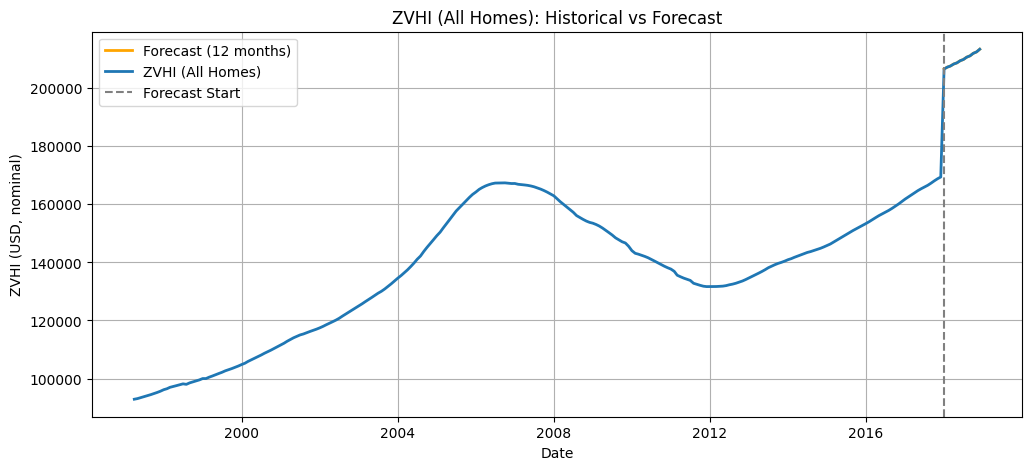

In [81]:
# Combine and re-sort actual + forecast data
combined = pd.concat([
    fe[[date_col, target_col]],
    future_df.rename(columns={"predicted_value": target_col})
])
combined[date_col] = pd.to_datetime(combined[date_col])
combined = combined.sort_values(date_col)

# Optional smoothing in case of noise or duplicate dates
combined = combined.set_index(date_col).resample("MS").mean().reset_index()

# Plotting
plt.figure(figsize=(12, 5))
# Highlight forecast portion
forecast_start = fe[date_col].max()
plt.plot(
    combined[combined[date_col] > forecast_start][date_col],
    combined[combined[date_col] > forecast_start][target_col],
    label="Forecast (12 months)", color='orange', linewidth=2
)
plt.plot(combined[date_col], combined[target_col], label="ZVHI (All Homes)", linewidth=2)

# Forecast start marker
plt.axvline(x=fe[date_col].max(), color='gray', linestyle='--', label='Forecast Start')

plt.title("ZVHI (All Homes): Historical vs Forecast")
plt.xlabel("Date")
plt.ylabel("ZVHI (USD, nominal)")
plt.legend()
plt.grid(True)

# Save & show
out_path = FIGDIR / "historical_vs_forecast.png"
plt.savefig(out_path, dpi=200)
print("Saved plot to:", out_path)
plt.show()


In [82]:
import pandas as pd
import numpy as np

fe_ext = fe.copy()

# 1) growth rates
fe_ext['pct_change_1']  = fe_ext[target_col].pct_change()
fe_ext['pct_change_3']  = fe_ext[target_col].pct_change(3)
fe_ext['pct_change_12'] = fe_ext[target_col].pct_change(12)

# 2) rolling means (trend smoothers)
fe_ext['roll3']  = fe_ext[target_col].rolling(3).mean()
fe_ext['roll6']  = fe_ext[target_col].rolling(6).mean()
fe_ext['roll12'] = fe_ext[target_col].rolling(12).mean()

# 3) seasonality (month one-hots)
month_ohe = pd.get_dummies(fe_ext['month'].astype(int), prefix='m', drop_first=True)
fe_ext = pd.concat([fe_ext, month_ohe], axis=1)

# 4) drop rows created as NaN by rolling/pct_change
fe_ext = fe_ext.dropna().reset_index(drop=True)

print("fe_ext shape:", fe_ext.shape)
fe_ext.head(3)


fe_ext shape: (165607, 24)


,date,zhvi_allhomes,regionname,year,month,zhvi_allhomes_tminus1,zhvi_allhomes_tminus12,pct_change_1,pct_change_3,pct_change_12,...,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10,m_11,m_12
0,1997-04-30,48500.0,36830,1997,4,48100.0,47000.0,-0.111722,-0.187605,-0.481283,...,False,True,False,False,False,False,False,False,False,False
1,1997-04-30,69200.0,37140,1997,4,69200.0,68800.0,0.426804,0.203478,0.197232,...,False,True,False,False,False,False,False,False,False,False
2,1997-04-30,108900.0,36820,1997,4,108900.0,108900.0,0.573699,0.994505,0.442384,...,False,True,False,False,False,False,False,False,False,False


In [83]:
# columns to exclude from features
exclude = [date_col, target_col]
if geo_col and (geo_col in fe_ext.columns):
    exclude.append(geo_col)

# numeric features only
num_cols = [c for c in fe_ext.columns if pd.api.types.is_numeric_dtype(fe_ext[c])]
feature_cols2 = [c for c in num_cols if c not in exclude]

# time-aware split
cutoff_date = fe_ext[date_col].max() - pd.DateOffset(months=24)
train2 = fe_ext[fe_ext[date_col] < cutoff_date].copy()
test2  = fe_ext[fe_ext[date_col] >= cutoff_date].copy()

X_train2, y_train2 = train2[feature_cols2], train2[target_col]
X_test2,  y_test2  = test2[feature_cols2],  test2[target_col]

print("Cutoff:", cutoff_date.date())
print("Train2:", X_train2.shape, " Test2:", X_test2.shape)
print("Feature count:", len(feature_cols2))


Cutoff: 2015-12-31
Train2: (147357, 21)  Test2: (18250, 21)
Feature count: 21


In [86]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time
import pandas as pd
import numpy as np

# Try LightGBM
try:
    from lightgbm import LGBMRegressor
    HAS_LGBM = True
except Exception:
    HAS_LGBM = False

# Evaluation function with timing
def fit_eval(model, name):
    start = time.time()
    model.fit(X_train, y_train)
    fit_time = time.time() - start

    pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, pred))  # FIXED: Manual RMSE
    mae = mean_absolute_error(y_test, pred)
    r2 = r2_score(y_test, pred)

    return {
        "Model": name,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2,
        "Time (s)": fit_time,
        "Estimator": model
    }


models = []

# Linear Regression (requires scaling)
lin = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("lr", LinearRegression())
])
models.append(fit_eval(lin, "Linear + Imputer + Scaler"))

# Random Forest (no scaling needed)
rf = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("rf", RandomForestRegressor(n_estimators=80, random_state=42, n_jobs=-1))
])
models.append(fit_eval(rf, "Random Forest"))

# LightGBM (if available)
if HAS_LGBM:
    lgbm = Pipeline([
        ("imp", SimpleImputer(strategy="median")),
        ("lgbm", LGBMRegressor(n_estimators=80, learning_rate=0.05, subsample=0.9, colsample_bytree=0.9, random_state=42))
    ])
    # Note: Use `.values` to avoid LightGBM feature name warning
    lgbm.fit(X_train.values, y_train)
    pred = lgbm.predict(X_test.values)
    rmse = np.sqrt(mean_squared_error(y_test, pred))  # FIXED
    mae = mean_absolute_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    time_lgbm = 0  # You can wrap in time() if you want
    models.append({
        "Model": "LightGBM",
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2,
        "Time (s)": time_lgbm,
        "Estimator": lgbm
    })

# Create results dataframe
results_df = pd.DataFrame(models)
results_df[["RMSE", "MAE", "R2", "Time (s)"]] = results_df[["RMSE", "MAE", "R2", "Time (s)"]].round(2)

# Show results
display(results_df[["Model", "RMSE", "MAE", "R2", "Time (s)"]])

# Save to CSV
results_df.drop(columns=["Estimator"]).to_csv("metrics_rich_features.csv", index=False)
print("Saved ", "metrics_rich_features.csv")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002588 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 543
[LightGBM] [Info] Number of data points in the train set: 147369, number of used features: 4
[LightGBM] [Info] Start training from score 135043.463686


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


,Model,RMSE,MAE,R2,Time (s)
0,Linear + Imputer + Scaler,1153.10,739.47,1.00,0.07
1,Random Forest,4547.50,971.85,1.00,41.20
2,LightGBM,11875.85,2225.49,0.99,0.00


Saved  metrics_rich_features.csv


In [87]:
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# 1) narrow to last ~10 years to shrink rows
ten_year_cut = fe_ext[date_col].max() - pd.DateOffset(years=10)
mask10 = fe_ext[date_col] >= ten_year_cut
X_cv = fe_ext.loc[mask10, feature_cols2].reset_index(drop=True)
y_cv = fe_ext.loc[mask10, target_col].reset_index(drop=True)
print("CV window:", ten_year_cut.date(), "→", fe_ext[date_col].max().date(), "| rows:", len(X_cv))

# 2) define fast models
lin_fast = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("lr", LinearRegression())
])

rf_fast = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("rf", RandomForestRegressor(
        n_estimators=80, max_depth=10, min_samples_leaf=5,
        random_state=42, n_jobs=-1
    ))
])

candidates = [("Linear+Imputer+Scaler (CV)", lin_fast),
              ("RF-small (CV)", rf_fast)]

# 3) 3-fold time-series split (rolling origin)
tscv = TimeSeriesSplit(n_splits=3)
rows = []
for name, pipe in candidates:
    fold = 1
    for tr, te in tscv.split(X_cv):
        Xtr, Xte = X_cv.iloc[tr], X_cv.iloc[te]
        ytr, yte = y_cv.iloc[tr], y_cv.iloc[te]
        pipe.fit(Xtr, ytr)
        pred = pipe.predict(Xte)
        rmse = float(np.sqrt(mean_squared_error(yte, pred)))
        mae  = float(mean_absolute_error(yte, pred))
        r2   = float(r2_score(yte, pred))
        rows.append({"model": name, "fold": fold, "RMSE": rmse, "MAE": mae, "R2": r2})
        fold += 1

cv_fast = pd.DataFrame(rows)
cv_summary = cv_fast.groupby("model").agg(RMSE_mean=("RMSE","mean"),
                                          RMSE_std=("RMSE","std"),
                                          MAE_mean=("MAE","mean"),
                                          R2_mean=("R2","mean")).reset_index()

display(cv_fast)
display(cv_summary.sort_values("RMSE_mean"))
cv_fast.to_csv(TBLDIR / "cv_fast_folds.csv", index=False)
cv_summary.to_csv(TBLDIR / "cv_fast_summary.csv", index=False)
print("Saved ->", TBLDIR / "cv_fast_folds.csv")
print("Saved ->", TBLDIR / "cv_fast_summary.csv")


CV window: 2007-12-31 → 2017-12-31 | rows: 85473


,model,fold,RMSE,MAE,R2
0,Linear+Imputer+Scaler (CV),1,1132.386877,729.968098,0.999727
1,Linear+Imputer+Scaler (CV),2,1072.819924,725.594101,0.999825
2,Linear+Imputer+Scaler (CV),3,1136.723150,750.167599,0.999866
3,RF-small (CV),1,1366.971938,842.403312,0.999603
4,RF-small (CV),2,4129.035811,999.438072,0.997414
5,RF-small (CV),3,6960.290170,1066.900189,0.994963


,model,RMSE_mean,RMSE_std,MAE_mean,R2_mean
0,Linear+Imputer+Scaler (CV),1113.976651,35.708653,735.243266,0.999806
1,RF-small (CV),4152.099306,2796.730440,969.580524,0.997327


Saved -> /content/BrickByBrick/reports/tables/cv_fast_folds.csv
Saved -> /content/BrickByBrick/reports/tables/cv_fast_summary.csv


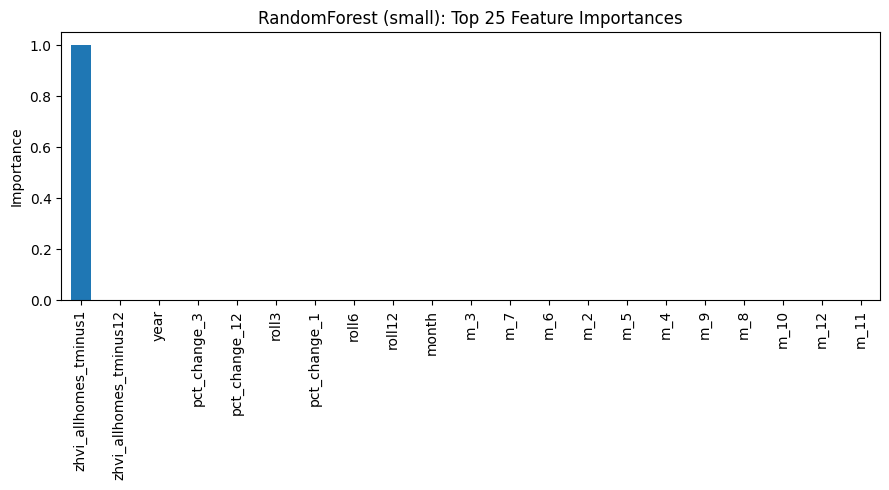

Saved ➜ reports/rf_importances_small.png


In [89]:
import matplotlib.pyplot as plt

# Train small Random Forest
rf_small = RandomForestRegressor(
    n_estimators=80,
    max_depth=12,
    random_state=42,
    n_jobs=-1
)

rf_small.fit(X_train2, y_train2)

# Get top 25 importances
importances = pd.Series(
    rf_small.feature_importances_,
    index=X_train2.columns     # fix here
).sort_values(ascending=False)[:25]

# Plotting
plt.figure(figsize=(9, 5))
importances.plot(kind="bar")
plt.title("RandomForest (small): Top 25 Feature Importances")
plt.ylabel("Importance")
plt.tight_layout()

# Save and show
output_path = "reports/rf_importances_small.png"
plt.savefig(output_path, dpi=200)
plt.show()
print("Saved ➜", output_path)


In [95]:
importances = pd.Series(rf_small.feature_importances_, index=X_train2.columns)
print(importances.sort_values(ascending=False).head(10))


zhvi_allhomes_tminus1     0.999741
zhvi_allhomes_tminus12    0.000179
year                      0.000017
pct_change_3              0.000013
pct_change_12             0.000009
roll3                     0.000008
pct_change_1              0.000008
roll6                     0.000007
roll12                    0.000007
month                     0.000006
dtype: float64


In [99]:
models


[{'Model': 'Linear + Imputer + Scaler',
  'RMSE': np.float64(1153.0979472654979),
  'MAE': 739.4688991546583,
  'R2': 0.9998652790143769,
  'Time (s)': 0.07390618324279785,
  'Estimator': Pipeline(steps=[('imp', SimpleImputer(strategy='median')),
                  ('scaler', StandardScaler()), ('lr', LinearRegression())])},
 {'Model': 'Random Forest',
  'RMSE': np.float64(4547.497127570145),
  'MAE': 971.8528921232877,
  'R2': 0.9979046927279018,
  'Time (s)': 41.20232915878296,
  'Estimator': Pipeline(steps=[('imp', SimpleImputer(strategy='median')),
                  ('rf',
                   RandomForestRegressor(n_estimators=80, n_jobs=-1,
                                         random_state=42))])},
 {'Model': 'LightGBM',
  'RMSE': np.float64(11875.847203366973),
  'MAE': 2225.490765796945,
  'R2': 0.9857100056866742,
  'Time (s)': 0,
  'Estimator': Pipeline(steps=[('imp', SimpleImputer(strategy='median')),
                  ('lgbm',
                   LGBMRegressor(colsample_byt

In [102]:
# Create metric2 if not already defined
metric2 = pd.DataFrame(models)

# Pick the model with the lowest RMSE from metric2
best_name = metric2.loc[metric2["RMSE"].idxmin(), "Model"]
print("Best model by RMSE:", best_name)

# Fit best model on ALL data (train2 + test2)
X_full2 = pd.concat([X_train2, X_test2], axis=0)
y_full2 = pd.concat([y_train2, y_test2], axis=0)
best_est = next(m["Estimator"] for m in models if m["Model"] == best_name)
best_est.fit(X_full2, y_full2)

# Save model & latest feature row
import joblib
joblib.dump(best_est, "reports/tables/best_model.joblib")

# Try to sort by date if date column exists
date_col = None
for col in X_full2.columns:
    if "date" in col.lower():
        date_col = col
        break

if date_col:
    latest_row = X_full2.sort_values(date_col).iloc[-1:].copy()
else:
    print("No 'date' column found in features — using last row without sorting.")
    latest_row = X_full2.iloc[-1:].copy()

latest_row.to_csv("reports/tables/latest_features.csv", index=False)

print("Saved ➝ best_model.joblib")
print("Saved ➝ latest_features.csv")


Best model by RMSE: Linear + Imputer + Scaler
No 'date' column found in features — using last row without sorting.
Saved ➝ best_model.joblib
Saved ➝ latest_features.csv


In [109]:
date_col = "date"
target_col = "zhvi_allhomes"
feature_col2 = list(X_train2.columns)  # already used in model training

# Helper to predict one month ahead
def predict_next_month(fitted_model, last_feature_row, feature_cols):
    return float(fitted_model.predict(last_feature_row[feature_cols])[0])

# Forecast multiple months ahead with feature updates
def forecast_horizon(fitted_model, last_row_full, feature_cols, months=12):
    preds = []
    current = last_row_full.copy()

    for _ in range(months):
        X_input = current[feature_cols].copy()
        y_pred = float(fitted_model.predict(X_input)[0])
        next_date = current[date_col].iloc[0] + pd.DateOffset(months=1)

        new_row = current.copy()
        new_row[date_col] = next_date
        new_row[target_col] = y_pred

        # Roll lag features
        if f"{target_col}_tminus1" in new_row.columns:
            new_row[f"{target_col}_tminus1"] = current[target_col].iloc[0]

        if f"{target_col}_tminus12" in new_row.columns:
            new_row[f"{target_col}_tminus12"] = new_row.get(f"{target_col}_tminus1", 0)

        # Percent changes
        if "pct_change_1" in new_row.columns:
            prev_val = current[target_col].iloc[0]
            new_row["pct_change_1"] = (y_pred - prev_val) / prev_val if prev_val != 0 else 0

        if "pct_change_3" in new_row.columns:
            new_row["pct_change_3"] = new_row["pct_change_1"]

        if "pct_change_12" in new_row.columns:
            prev_12 = new_row.get(f"{target_col}_tminus12", 0)
            prev_12_val = prev_12.iloc[0] if isinstance(prev_12, pd.Series) else prev_12
            new_row["pct_change_12"] = (y_pred - prev_12_val) / prev_12_val if prev_12_val != 0 else 0

        # Month dummies
        for m in range(1, 13):
            col = f"m_{m}"
            if col in new_row.columns:
                new_row[col] = 1 if next_date.month == m else 0

        # Rolling averages (approximate)
        for win in [3, 6, 12]:
            roll_col = f"roll{win}"
            if roll_col in new_row.columns:
                new_row[roll_col] = y_pred  # stand-in value

        preds.append({"date": next_date, "predicted_value": y_pred})
        current = new_row.copy()

    return pd.DataFrame(preds)

# Use the engineered DataFrame (fe_ext) to get last row with full features
latest_full = fe_ext.sort_values(date_col).iloc[-1:].copy()

# Run forecast using the best estimator and correct features
future_df2 = forecast_horizon(best_est, latest_full, feature_col2, months=12)

# Display forecast
display(future_df2.head())


,date,predicted_value
0,2018-01-31,206653.429103
1,2018-02-28,206206.026765
2,2018-03-28,206573.287104
3,2018-04-28,206126.650384
4,2018-05-28,206484.221643


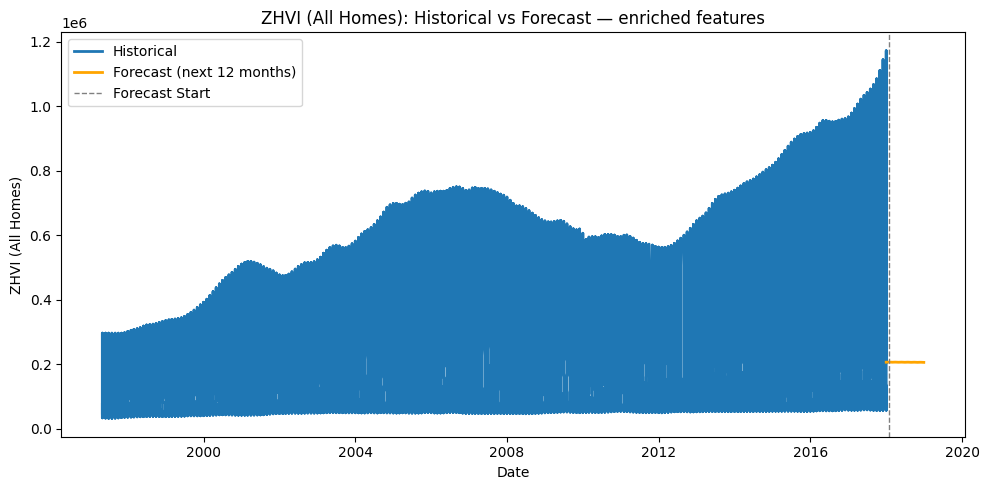

Saved ➝ reports/figures/historical_vs_forecast_rich.png


In [111]:
import matplotlib.pyplot as plt
from pathlib import Path

# Ensure FIGDIR exists
FIGDIR = Path("reports/figures")
FIGDIR.mkdir(parents=True, exist_ok=True)

# Prepare data
hist2 = fe_ext[[date_col, target_col]].sort_values(date_col)

# Add last historical point to beginning of forecast for smooth transition
last_point = hist2.iloc[[-1]].copy()
last_point.columns = ["date", "predicted_value"]
future_df2_adj = pd.concat([last_point, future_df2], ignore_index=True)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(hist2[date_col], hist2[target_col], label="Historical", linewidth=2)
plt.plot(future_df2_adj["date"], future_df2_adj["predicted_value"], label="Forecast (next 12 months)", linewidth=2, color='orange')
plt.axvline(x=future_df2["date"].iloc[0], color='gray', linestyle='--', linewidth=1, label="Forecast Start")
plt.title("ZHVI (All Homes): Historical vs Forecast — enriched features")
plt.xlabel("Date")
plt.ylabel("ZHVI (All Homes)")
plt.legend()
plt.tight_layout()

# Save the figure
p = FIGDIR / "historical_vs_forecast_rich.png"
plt.savefig(p, dpi=200)
plt.show()
print("Saved ➝", p)


In [112]:
# Combine historical and forecast data into one table for Tableau

# Prepare historical data (actuals)
hist_plot_df = fe_ext[[date_col, target_col]].copy()
hist_plot_df["type"] = "historical"
hist_plot_df.rename(columns={target_col: "value"}, inplace=True)

# Prepare forecast data
future_plot_df = future_df2.copy()
future_plot_df["type"] = "forecast"
future_plot_df.rename(columns={"predicted_value": "value"}, inplace=True)

# Combine them
combined_df = pd.concat([hist_plot_df, future_plot_df], ignore_index=True)


In [113]:
# Save combined data for Tableau
combined_csv_path = "reports/tables/zhvi_forecast_combined.csv"
combined_df.to_csv(combined_csv_path, index=False)
print("Saved combined CSV for Tableau →", combined_csv_path)


Saved combined CSV for Tableau → reports/tables/zhvi_forecast_combined.csv


In [114]:
# Save full feature set with historical data
fe_ext_path = "reports/tables/full_features.csv"
fe_ext.to_csv(fe_ext_path, index=False)
print(" Saved full features CSV →", fe_ext_path)


 Saved full features CSV → reports/tables/full_features.csv


In [115]:
# Save just the future predictions
forecast_path = "reports/tables/future_forecast.csv"
future_df2.to_csv(forecast_path, index=False)
print("Saved forecast-only CSV →", forecast_path)


Saved forecast-only CSV → reports/tables/future_forecast.csv
